## Understand the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Cleaning and preprocessing

In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Split data into train and test

In [10]:
X = df.drop(columns='medv',axis =1)
y = df['medv']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.fit_transform(X_test)

## Train a machine learning model( Using Linear Regression)

In [17]:
# Using Unscaled data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_unscaled = model.predict(X_test)

In [72]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_unscaled
}, index=y_test.index)  

# Show the first few rows
print(comparison_df.head())


     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


In [18]:
# Using Scaled data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred_scaled = model.predict(X_test_scaled)

## Evaluate the model

In [22]:
from sklearn.metrics import r2_score
print("Unscaled data score: ", r2_score(y_test,y_pred_unscaled))
print("Scaled data score: ", r2_score(y_test,y_pred_scaled))

Unscaled data score:  0.6687594935356326
Scaled data score:  0.6262727067493542


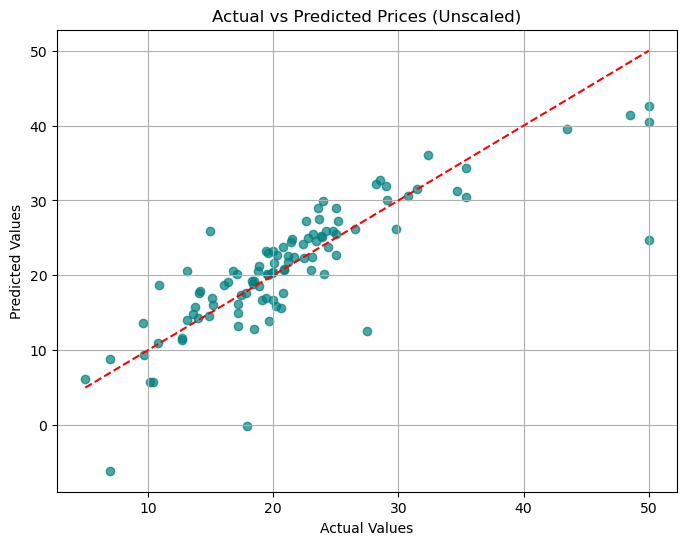

In [53]:
#Visualize actual and predicted value

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_unscaled, alpha=0.7, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Prices (Unscaled)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.grid(True)
plt.show()


In [54]:
## Using Pipeline and column transformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'b', 'crim']  
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Test R^2 Score:", score)

Test R^2 Score: 0.6687594935356299


## Train a machine learning model (Using Lasso and Ridge Regression)

In [31]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred= model_lasso.predict(X_test)

In [32]:
 r2_score(y_test,y_pred)

0.6671453631686304

In [49]:
from sklearn.linear_model import Ridge
model_ridge= Ridge()
model_ridge.fit(X_train,y_train)
y_pred = model_ridge.predict(X_test)

In [50]:
 r2_score(y_test,y_pred)

0.6662221670168522

## Hyperparameter tuning

In [44]:
# For lasso regression

from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.01,0.1,1,10,100]}
grid = GridSearchCV(Lasso(),params, cv =5,scoring ='r2')
grid.fit(X_train_scaled,y_train)
y_pred_lasso = grid.best_estimator_.predict(X_test_scaled)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.01}
0.7241453136360594


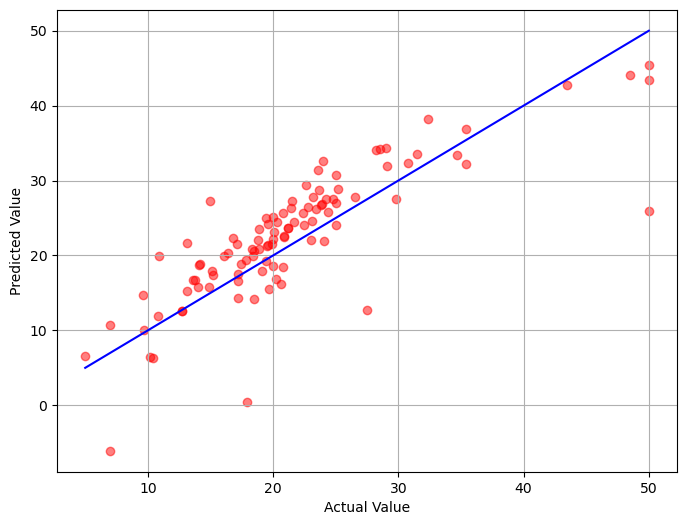

In [48]:
#visualizing actual and predicted value

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_lasso, alpha = 0.5, color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'b-')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.show()

In [51]:
# For ridge regression

params = {'alpha':[0.01,0.1,1,10,100]}
grid_ridge = GridSearchCV(Ridge(),params,cv=5,scoring='r2')
grid_ridge.fit(X_train_scaled,y_train)
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test_scaled)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 1}
0.7245141552849549


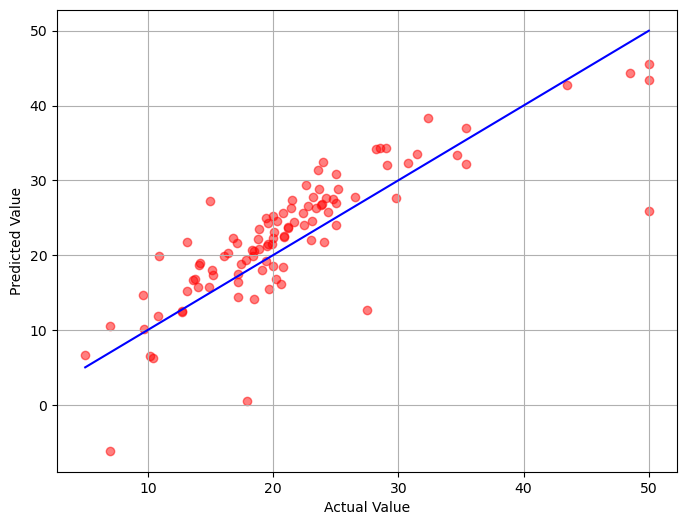

In [55]:
#visualizing actual and predicted value
plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_ridge, alpha = 0.5, color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'b-')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.show()

## Saving the best model

In [66]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(pipe,params,cv=5,scoring='r2')
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [67]:
import joblib

In [68]:
joblib.dump(grid_ridge.best_estimator_,'ridge_model.pkl')


['ridge_model.pkl']

In [70]:
loaded_model = joblib.load('ridge_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)

In [71]:
r2_score(y_test,y_pred_loaded)

0.668462435964356